In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
data = pd.read_csv("csgo_round_snapshots.csv")
pd.set_option('display.max_columns', None)

In [4]:
data = data.dropna()

In [5]:
data.shape

(122410, 97)

In [6]:
temp = data[data["round_winner"] == "T"]
temp.shape

(62406, 97)

### Exploratory Data Analysis

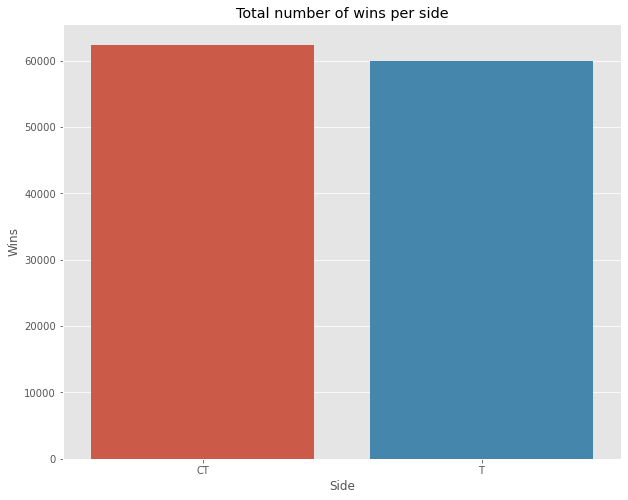

In [7]:
# Plot for total wins per team
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data['round_winner'].unique(), y=data['round_winner'].value_counts())
ax.set(title='Total number of wins per side', xlabel='Side', ylabel='Wins')
plt.show()

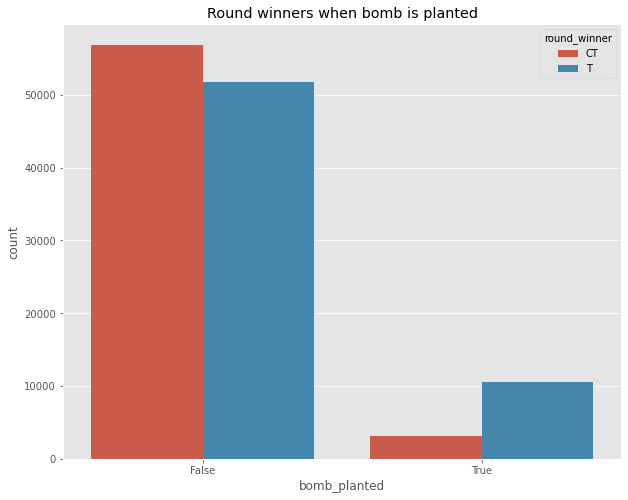

In [8]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="bomb_planted", hue="round_winner", data=data)
ax.set(title='Round winners when bomb is planted')
plt.show()

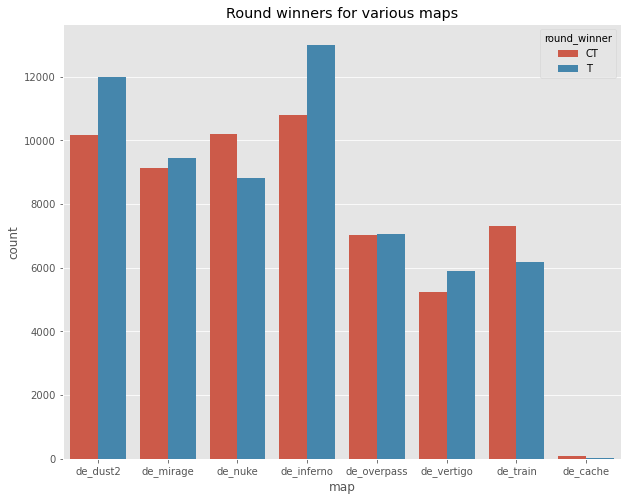

In [9]:
# Winners in different maps
plt.figure(figsize=(10,8))
ax = sns.countplot(x="map", hue="round_winner", data=data)
ax.set(title='Round winners for various maps')
plt.show()

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Dropping single valued columns
    for column in data.columns:
        if len(data[column].unique())==1:
            df = df.drop([column], axis=1)
    
    # Encoding binary columns
    df["bomb_planted"] = df["bomb_planted"].astype(np.int16)
    df["round_winner"] = df["round_winner"].replace({"T":0, "CT":1})
    
    # Encoding the map column using Label Encoder
    encoder = LabelEncoder()
    df["map"] = encoder.fit_transform(df["map"]) 
    
    # Splitting the data
    y = df["round_winner"]
    X = df.drop("round_winner", axis=1)
    
    # Scaling the data
    scaler = RobustScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.80, random_state=42)
        
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data) 

### Naive Bayes

 Train Accuracy:61.635078833428636
 Test Accuracy:61.78008332652561


<AxesSubplot:>

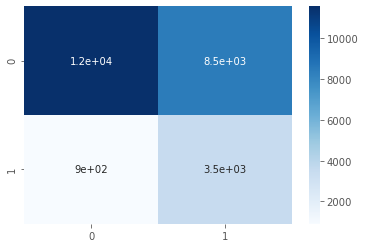

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

print(f" Train Accuracy:{model.score(X_train, y_train)*100}") 
print(f" Test Accuracy:{model.score(X_test, y_test)*100}")

pred_test = model.predict(X_test)
test_cf_matrix = confusion_matrix(pred_test, y_test)

sns.heatmap(test_cf_matrix, annot= True, cmap="Blues")

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(f" Train Accuracy:{model.score(X_train, y_train)*100}") 
print(f" Test Accuracy:{model.score(X_test, y_test)*100}") 

 Train Accuracy:74.94792092149333
 Test Accuracy:75.00612695041255


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(f" Train Accuracy:{model.score(X_train, y_train)*100}") 
print(f" Test Accuracy:{model.score(X_test, y_test)*100}") 

 Train Accuracy:99.71918143942489
 Test Accuracy:82.0112735887591


### Artificial Neural Networks

In [15]:
from sklearn.neural_network import MLPClassifier 

model = MLPClassifier(hidden_layer_sizes=(80, 40, 20,))
model.fit(X_train, y_train)

print(f" Train Accuracy:{model.score(X_train, y_train)*100}") 
print(f" Test Accuracy:{model.score(X_test, y_test)*100}") 

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 Train Accuracy:90.19177354791276
 Test Accuracy:81.59872559431419
